# **Spanish High Speed Rail tickets pricing - Renfe**

   #### Ticket pricing for routes
   _Author: Keyla Méndez_ | _Oct-2019_

**Machine Learning Project.**

The objective is to predict the value of the AVE ticket in advance, taking into account the previous values. 

**Dataset**

The dataset is available in CSV format in [Kaggle](https://www.kaggle.com/thegurusteam/spanish-high-speed-rail-system-ticket-pricing ) 

CSV data file: the data is obtained from the ticket price monitoring system of the Spanish High Speed Train Service (Renfe AVE).


**Contents** 

* insert_date: date and time when the price was collected and written in the database, scrapping time (UTC)
* origin: origin city
* destination: destination city
* start_date: train departure time (European Central Time)
* end_date: train arrival time (European Central Time)
* train_type: train service name
* price: price (euros)
* train_class: ticket class, tourist, business, etc.
* fare: ticket fare, round trip, etc.

In [49]:
import pandas as pd #data processing, csv file
import numpy as np # linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns #;sns.set() #visualization 
import os
#PLotly
import plotly as py 
import plotly.graph_objects as go
import plotly.express as px 

In [2]:
#load data
data = pd.read_csv("C:/Users/KEYLA/Documents/FINAL PROJECT/renfe.csv")

In [3]:
#Check the data 
data.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo


In [4]:
data.columns

Index(['insert_date', 'origin', 'destination', 'start_date', 'end_date',
       'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [5]:
#Data information
data.dtypes
#data.info()

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

It can convert the columns that are of datetime type using a function and change the type. 

In [6]:
def convert_date(data): 
    return pd.to_datetime(data)

In [7]:
data.insert_date = convert_date(data.insert_date)
data.start_date = convert_date(data.start_date)
data.end_date = convert_date(data.end_date)

In [8]:
#Check the conversion to date 
data.dtypes #Done!

insert_date    datetime64[ns]
origin                 object
destination            object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type             object
price                 float64
train_class            object
fare                   object
dtype: object

In [9]:
#Create a column 'origin_destination'
data['origin_dest'] = data.origin + '-' + data.destination
data.head(2)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,origin_dest
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo,MADRID-BARCELONA
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo,MADRID-BARCELONA


In [10]:
print(f'Unique Value Origin-Destination: {data.origin_dest.unique()}' )

Unique Value Origin-Destination: ['MADRID-BARCELONA' 'MADRID-SEVILLA' 'MADRID-VALENCIA' 'SEVILLA-MADRID'
 'MADRID-PONFERRADA' 'BARCELONA-MADRID' 'VALENCIA-MADRID'
 'PONFERRADA-MADRID']


We can see that Madrid is a key station where people travel to and from MADRID to all other
places.

#### Data  Visualization

Here we can see the distribution of prices in Fare and Train_class

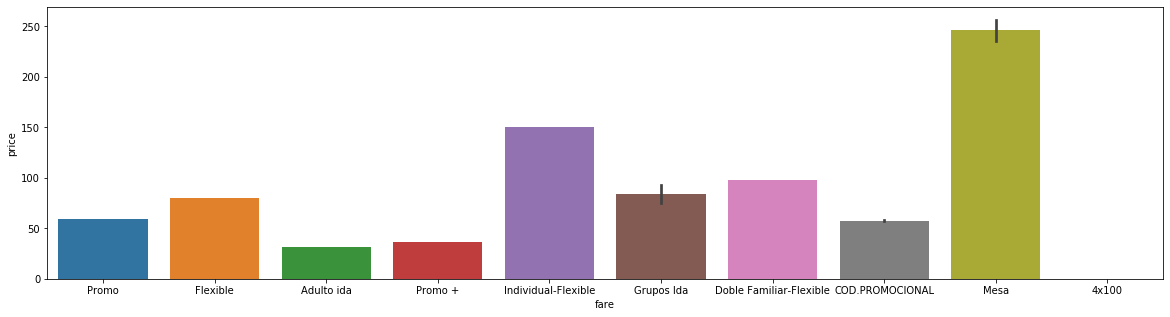

In [15]:
#fig, ax = plt.subplots(figsize=[20,5])
#sns.barplot(x="fare", y="price", data=data, ax = ax)
#data['fare'].value_counts().plot.bar()

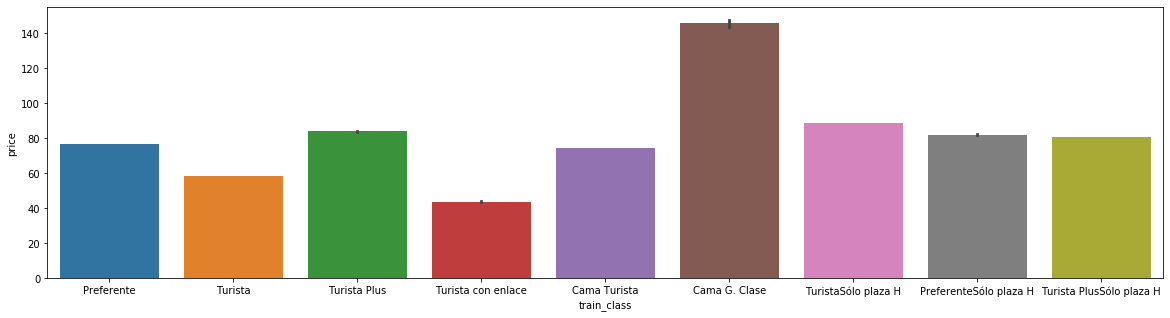

In [16]:
#fig, ax = plt.subplots(figsize=[20,5])
#sns.barplot(x="train_class", y="price", data=data, ax = ax)

Distribution

Text(0, 0.5, 'Number of trips')

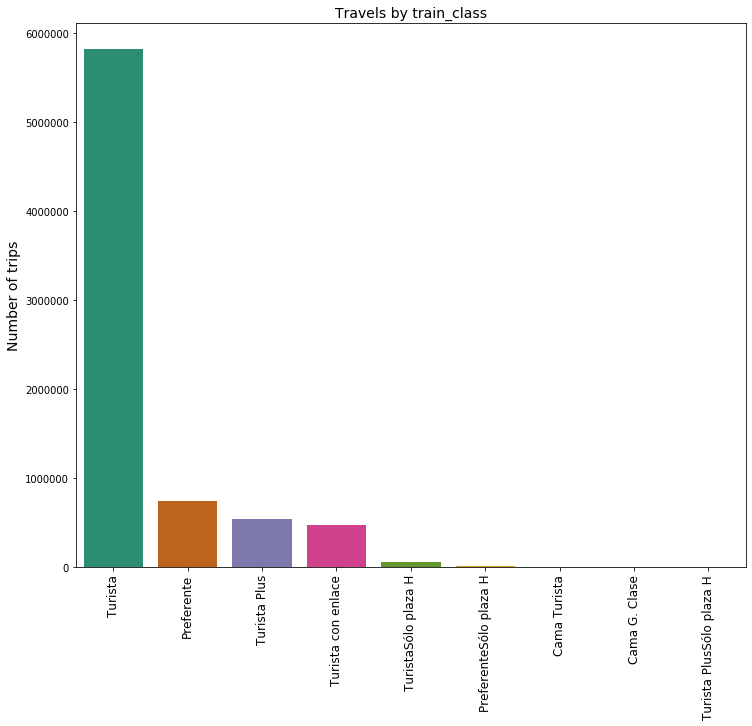

In [13]:
#data['train_class'].value_counts().plot.bar() (basic plot)
check  = data['train_class'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(check.index, check.values, palette = "Dark2")
plt.xticks(rotation='vertical', fontsize= 12)
plt.title('Travels by train_class', fontsize= 14)
plt.ylabel('Number of trips', fontsize= 14)

In [11]:
data['train_class'].value_counts()

Turista                     5818271
Preferente                   745890
Turista Plus                 539701
Turista con enlace           473699
TuristaSólo plaza H           53960
PreferenteSólo plaza H         6739
Cama Turista                   6137
Cama G. Clase                   245
Turista PlusSólo plaza H         22
Name: train_class, dtype: int64

#### **Missing Values**

Let's take a look at all the columns with missing values, and decide whether to remove any row based on missing values.

In [12]:
data.isna().sum()

insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          573121
train_class     26690
fare            26690
origin_dest         0
dtype: int64

In [13]:
#View rows with missing data 
data[data.isna().any(axis=1)].head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,origin_dest
13,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,AVE,NaN,Preferente,Promo,MADRID-BARCELONA
20,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 21:25:00,2019-04-18 23:55:00,AVE,NaN,NaN,NaN,MADRID-BARCELONA
71,2019-04-11 21:50:04,MADRID,BARCELONA,2019-04-22 08:30:00,2019-04-22 11:15:00,AVE,NaN,Preferente,Promo,MADRID-BARCELONA
103,2019-04-11 21:50:20,MADRID,BARCELONA,2019-04-27 18:30:00,2019-04-27 21:20:00,AVE,NaN,Preferente,Promo,MADRID-BARCELONA
105,2019-04-11 21:50:20,MADRID,BARCELONA,2019-04-27 20:30:00,2019-04-27 23:40:00,AVE,NaN,Preferente,Promo,MADRID-BARCELONA



First setp will be to find the average price for each combination So, this can be done by using **groupby** function.

In [14]:
#Average price train between Type, Class and Fare.
avgPrice_train = data[~np.isnan(data['price'])].groupby(['origin','destination','train_type','train_class','fare']).agg({'price':np.mean})

In [15]:
avgPrice_train.head()

price
origin    destination train_type train_class fare                       
BARCELONA MADRID      AVE        Preferente  COD.PROMOCIONAL  111.100000
                                             Flexible         182.656385
                                             Grupos Ida       145.200000
                                             Mesa             290.400000
                                             Promo             95.806480

In [16]:
#Fill the missed value in the "fare" column with the value has the most frequency
data['fare'].fillna(data['fare'].mode()[0],inplace=True)

In [17]:
#Fill the missed value in the "train_class" column with the value has the most frequency
data['train_class'].fillna(data['train_class'].mode()[0],inplace=True)

In [18]:
#Fill the missed value in the "price" column with mean of the ticket price.
data.loc[data.price.isnull(), 'price'] = data.groupby(['fare']).price.transform('mean')

In [19]:
data.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
origin_dest    0
dtype: int64

**Feature Engineering** 

In [20]:
for i in ["insert_date", "start_date", "end_date"]:
    data[i + "_hour"] = data[i].dt.hour
    data[i + "_minute"] = data[i].dt.minute
    data[i + "_weekday"] = data[i].dt.weekday_name
    data[i + "_day"] = data[i].dt.day
    data[i + "_month"] = data[i].dt.month
    

I splitted the data date by timestamp and now let's see on which day, hour or weekday people travel more.

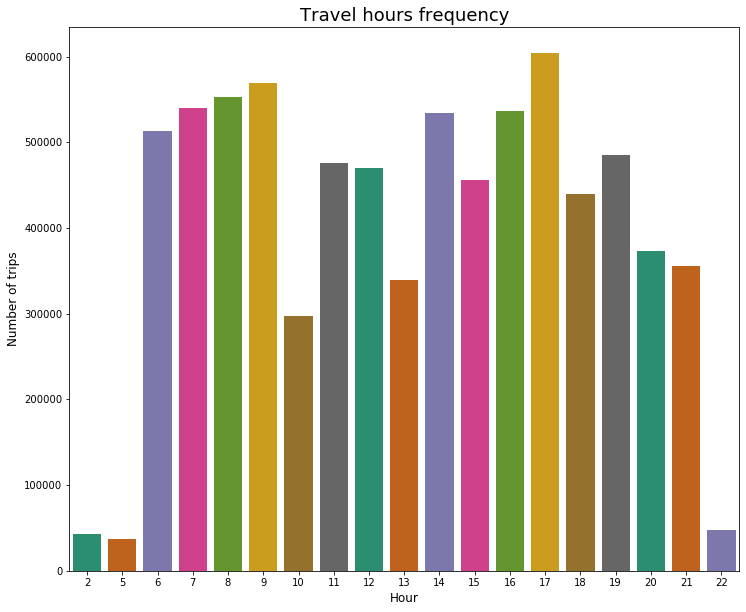

In [22]:
#Hours 
by_hours  = data['start_date'].dt.hour.value_counts()
plt.figure(figsize=(12,10))
sns.barplot(by_hours.index, by_hours.values, palette = "Dark2")
plt.title('Travel hours frequency',fontsize=18 )
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of trips", fontsize=12)
plt.show()

Majority of people travel at 9am and 5pm. 

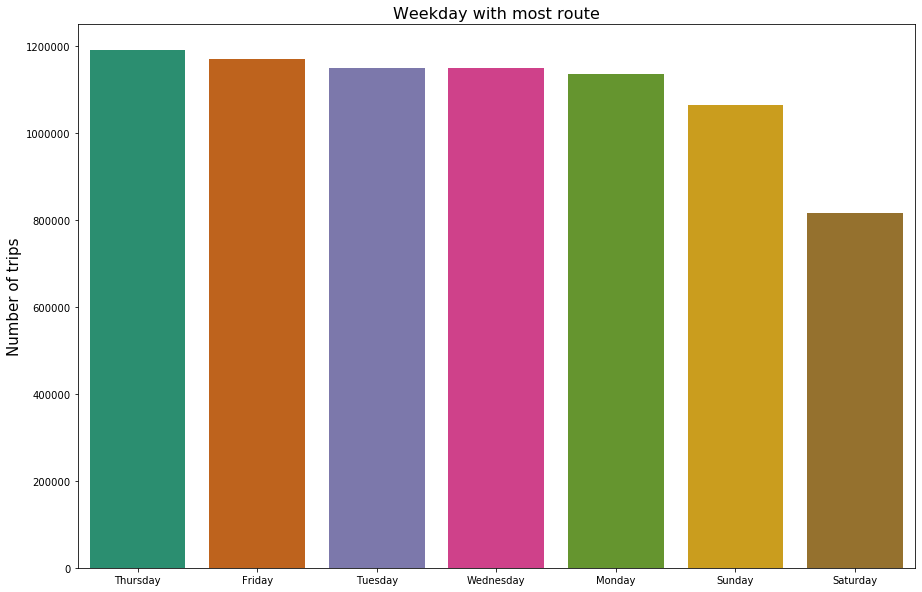

In [38]:
week_day = data["start_date_weekday"].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(week_day.index, week_day.values, palette = "Dark2")
plt.title('Weekday with most route', fontsize = 16)
plt.ylabel("Number of trips", fontsize=15)
#plt.xticks(rotation='vertical')
plt.show()

People travel mainly on Thursady and Friday

In [23]:
data['start_date_weekday'].value_counts()

Thursday     1189780
Friday       1169475
Tuesday      1149112
Wednesday    1148121
Monday       1135541
Sunday       1064096
Saturday      815229
Name: start_date_weekday, dtype: int64

**Now, let's see which route is the most preferred by travellers**

In [21]:
route = data['origin'] + ' To ' + data['destination']
route.value_counts().head()

MADRID To BARCELONA    1278936
BARCELONA To MADRID    1232526
MADRID To SEVILLA      1218280
SEVILLA To MADRID      1213981
MADRID To VALENCIA     1161004
dtype: int64

In [22]:
data.groupby(['origin','destination']).agg({'price':['count', np.mean]})

price           
                          count       mean
origin     destination                    
BARCELONA  MADRID       1232526  84.959360
MADRID     BARCELONA    1278936  85.287372
           PONFERRADA    180523  46.466160
           SEVILLA      1218280  59.599364
           VALENCIA     1161004  42.749956
PONFERRADA MADRID        320202  47.026325
SEVILLA    MADRID       1213981  58.259166
VALENCIA   MADRID       1065902  40.462567

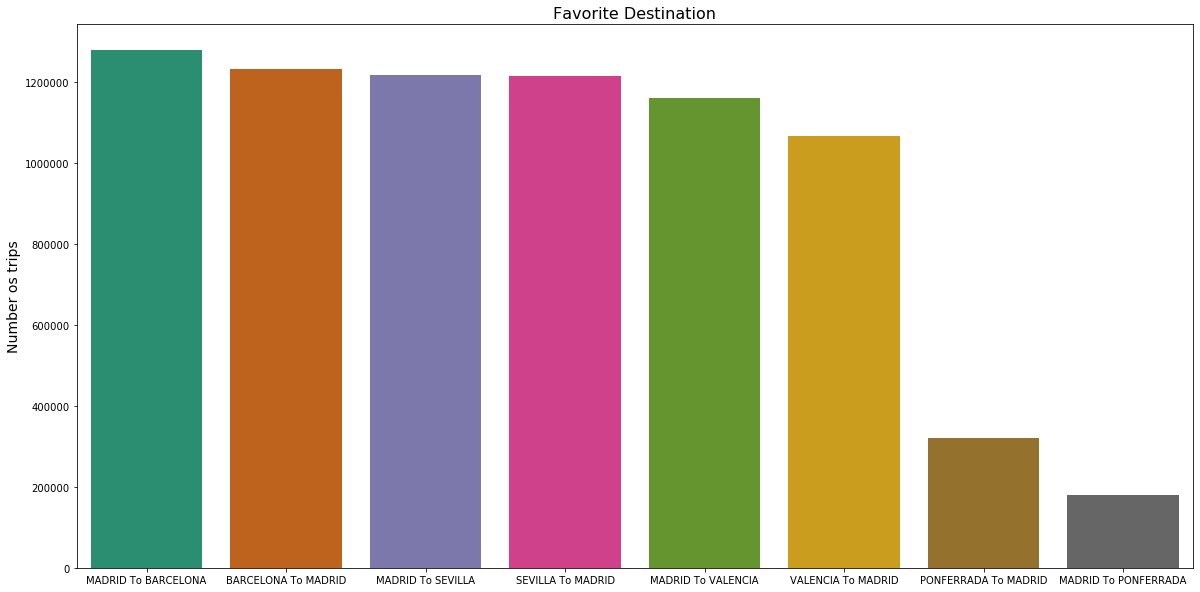

In [39]:
route1 = route.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(route1.index, route1.values, palette = 'Dark2')
plt.title('Favorite Destination', fontsize=16)
plt.ylabel('Number os trips', fontsize=14)
plt.show()

In [23]:
df = data[['origin_dest', 'train_type', 'price']]
df.head(3)

,origin_dest,train_type,price
0,MADRID-BARCELONA,AVE,68.95
1,MADRID-BARCELONA,AVE,75.40
2,MADRID-BARCELONA,AVE,106.75


* The most crowded route is between madrid and barcelona.
* We can see that Madrid is a key station where people travel to and from MADRID to all other places. **So Madrid is a terminal to connect all other four cities.**
* Ticket price of trips between Barcelona and Madrid are highest among others. 

#### Correlation Matrix 

In [24]:
corr = data.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)
#elimine caracteristicas que tenian mucha correlacion lo cual me iba a afectar en las predicciones finales.

,price,insert_date_hour,insert_date_minute,insert_date_day,insert_date_month,start_date_hour,start_date_minute,start_date_day,start_date_month,end_date_hour,end_date_minute,end_date_day,end_date_month
price,1,-0.00077,-0.021,-0.006,-0.098,0.049,-0.19,0.033,-0.18,-0.0093,-0.0039,0.032,-0.18
insert_date_hour,-0.00077,1,0.011,-0.0073,0.012,-0.0011,-0.0029,-0.0029,0.018,-0.0011,-3.1e-05,-0.0029,0.018
insert_date_minute,-0.021,0.011,1,0.0035,0.096,-0.012,0.089,-0.014,0.085,0.026,-0.01,-0.014,0.085
insert_date_day,-0.006,-0.0073,0.0035,1,-0.27,0.00017,0.0019,0.001,-0.054,-0.0014,0.0021,0.00077,-0.054
insert_date_month,-0.098,0.012,0.096,-0.27,1,-0.00023,0.013,-0.084,0.88,-0.0074,-0.028,-0.084,0.88
start_date_hour,0.049,-0.0011,-0.012,0.00017,-0.00023,1,-0.087,0.004,-0.004,0.72,0.028,0.0038,-0.0031
start_date_minute,-0.19,-0.0029,0.089,0.0019,0.013,-0.087,1,-0.00028,0.013,0.038,-0.11,1.8e-05,0.013
start_date_day,0.033,-0.0029,-0.014,0.001,-0.084,0.004,-0.00028,1,-0.29,0.0023,0.0064,1,-0.29
start_date_month,-0.18,0.018,0.085,-0.054,0.88,-0.004,0.013,-0.29,1,-0.0078,-0.029,-0.29,1
end_date_hour,-0.0093,-0.0011,0.026,-0.0014,-0.0074,0.72,0.038,0.0023,-0.0078,1,0.063,0.0027,-0.0092


In [25]:
data.drop(columns=['end_date_day', 'end_date_month'], inplace=True)

In [109]:
#Reduced 
corr = data.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

,price,insert_date_hour,insert_date_minute,insert_date_day,insert_date_month,start_date_hour,start_date_minute,start_date_day,start_date_month,end_date_hour,end_date_minute
price,1,-0.00077,-0.021,-0.006,-0.098,0.049,-0.19,0.033,-0.18,-0.0093,-0.0039
insert_date_hour,-0.00077,1,0.011,-0.0073,0.012,-0.0011,-0.0029,-0.0029,0.018,-0.0011,-3.1e-05
insert_date_minute,-0.021,0.011,1,0.0035,0.096,-0.012,0.089,-0.014,0.085,0.026,-0.01
insert_date_day,-0.006,-0.0073,0.0035,1,-0.27,0.00017,0.0019,0.001,-0.054,-0.0014,0.0021
insert_date_month,-0.098,0.012,0.096,-0.27,1,-0.00023,0.013,-0.084,0.88,-0.0074,-0.028
start_date_hour,0.049,-0.0011,-0.012,0.00017,-0.00023,1,-0.087,0.004,-0.004,0.72,0.028
start_date_minute,-0.19,-0.0029,0.089,0.0019,0.013,-0.087,1,-0.00028,0.013,0.038,-0.11
start_date_day,0.033,-0.0029,-0.014,0.001,-0.084,0.004,-0.00028,1,-0.29,0.0023,0.0064
start_date_month,-0.18,0.018,0.085,-0.054,0.88,-0.004,0.013,-0.29,1,-0.0078,-0.029
end_date_hour,-0.0093,-0.0011,0.026,-0.0014,-0.0074,0.72,0.038,0.0023,-0.0078,1,0.063


In [28]:
#Check Price
check_price = data['price'].value_counts()
check_price.head()

85.100000     375750
28.350000     366302
76.300000     352603
59.609119     333614
107.700000    272592
Name: price, dtype: int64

In [29]:
check_price.tail()

64.10     1
102.20    1
57.05     1
59.11     1
14.60     1
Name: price, dtype: int64

Let's take a closer at price, it seems to be numerical, but with a certain number of categories.

We will need to process the categorical data to be ready for input. The usual way to do that is to use OneHotEncoder, this is good for saving memory.

_OneHotEncoding:_ is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in predictions. 

### Predictions 

To make predictions in this case by price, so let's take price column into another dataframe

In [30]:
x = data.drop('price', axis = 1)
y = data.price

In [31]:
y.head(4)
#x.head

0     68.95
1     75.40
2    106.75
3     90.50
Name: price, dtype: float64

In [33]:
#Estimators and metrics 

import sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt 
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [34]:
x = x.drop(['insert_date', 'start_date','end_date'],axis=1)

In [35]:
onehot = OneHotEncoder()
x = onehot.fit_transform(x.values)

**BUILDING THE MODELS AND CHOOSING THE RIGHT MODEL**

In [37]:
#SPLIT DATA IN TRAINING AND TESTING 
x_train, x_test, y_train, y_test = train_test_split (x, y)

*Linear Regression*

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#print(cross_val_score (lr, x_train, y_train))
#[0.84180068 0.84133448 0.84125023]

In [41]:
#Simple score method that we can use om the trained model 
lr.score(x_test, y_test) 

0.8413764183741541

*Gradient Boosting*

In [54]:
%%time
gb = LGBMRegressor(n_estimators = 1000)
gb.fit(x_train, y_train)

Wall time: 4min 27s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [1]:
#print(cross_val_score (gb, x_train, y_train))
#[0.94165198 0.94223392 0.94138204]

In [58]:
#Simple score method that we can use om the trained model 
gb.score(x_test, y_test) #0.94

0.9421566870075536

In [ ]:
#Now we can choose the model with the best score and lets test the predictive ability of the model by predicting the prices

#### *Make Predictions* 

In [59]:
predictions = gb.predict(x_test)
predRsquared = r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.942
RMSE: 6.003


#### *Plotting Results*

[Text(0.5, 1.0, 'Compare prices predictions and real ')]

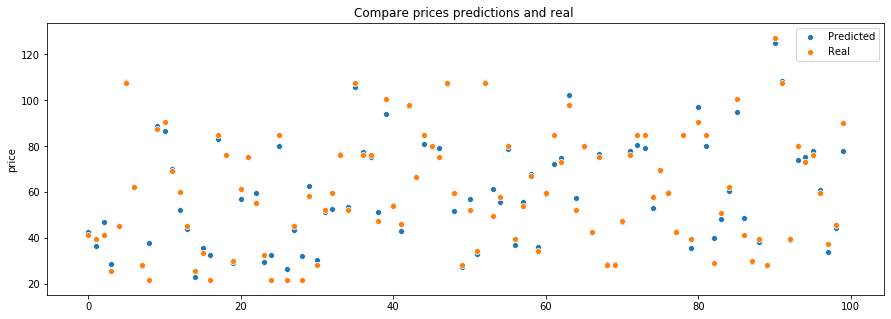

In [143]:
fig,axs = plt.subplots(ncols=1,nrows=1,figsize=(15,5))
ax = sns.scatterplot(px[:100],test_p[:100],label="Predicted")
ax = sns.scatterplot(px[:100],y_test[:100],label="Real")
ax.set(title="Final Visualization ")

##### *Conclusion*

* The model Gradient Boosting has good predictive ability.

* We were able to fit the price of the train tickets with an R2 of 94%, this is a very good fit.

* The price of tickets changes according to demand and time.